In [32]:
import pandas as pd
import params
import os
import json
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib import pyplot as plt
import seaborn as sns

## Preprocessing

load `data.json` and generate `data.csv` and `label.npy` through preprocessing

- `data.json`: raw data file including title, abstract and subject_name. See `data_df`.
- `data.csv`: data file including `sentence` field by concatenating `title` and `abstract`.
- `label.npy`: label file including the binary code of 40 labels.

In [33]:
# json to dataframe
data = json.load(open(os.path.join(params.DATA_DIR, 'data.json'), encoding='utf-8'))
data_df = pd.DataFrame(data)
data_df

,id,title,abstract,subject_name
0,0,Oxidative coupling of methane in the redox cyclic mode over the catalysts on the basis of CeO2 and La2O3,"The 1% CeO 2 , 9% La 2 O 3 /SiO 2 and 2% CeO 2 , 8% La 2 O 3 /SiO 2 catalysts show reliable efficiency in the OCM reaction, as well as stable work in the redox cyclic mode. Selectivity to C 2 products remarkably increases if preliminary reduction of the catalyst by a small amount of hydrogen is used.",[化学]
1,1,"Tissue engineering: strategies, stem cells and scaffolds.","Tissue engineering scaffolds are designed to influence the physical, chemical and biological environment surrounding a cell population. In this review we focus on our own work and introduce a range of strategies and materials used for tissue engineering, including the sources of cells suitable for tissue engineering: embryonic stem cells, bone marrow-derived mesenchymal stem cells and cord-derived mesenchymal stem cells. Furthermore, we emphasize the developments in custom scaffold design and manufacture, highlighting laser sintering, supercritical carbon dioxide processing, growth factor incorporation and zoning, plasma modification of scaffold surfaces, and novel multi-use temperature-sensitive injectable materials.",[医学]
2,2,Enhancement of Forced Convection Subcooled Film Boiling Heat Transfer Using Gas Sheet Collapse by Electric Field Application,"Enhancement of forced-convection boiling heat transfer by electriceld is investigated experimentally. When a high-temperature horizontallament is immersed in water, a gas sheet is formed around and the abovelament due to liquid boiling, in the early immersion process. This gas-sheet markedly decreases the boiling cooling rate of thelament. Here, forced collapse of the gas sheet is attempted by imposing an electriceld to enhance the boiling cooling rate, In the experiments, a horizontal platinum wire of 0.5mm in diameter is immersed in pure water under atmospheric pressure, and a DC voltage up to 600V is applied between the wire surface and an electrode made of glass placed 10mm apart. The whole boiling curve is measured under different applied voltages and wire-falling velocities in 0.5 to 2.0m/s range, and at subcooling of 60 K. The experimental results show that the electric field is effective in promoting the disintegration of the gas sheet. Under the tested conditions, boiling cooling rate increased two-fold for an applied electriceld of 600 V/cm. This result shows that the use of an electriceld to break up the gas-sheet has resulted in a remarkable increase in the cooling rate at high superheats during initial cooling period, which is even greater than that used in the existing material manufacturing processes by the rapid cooling method, and therefore, this method may contribute to developing new materials.",[物理学]
3,3,Exploiting Sheep and Goats at the Late Lengyel Settlement in Racot 18,"The excavations of Late Lengyel settlement in Racot 18 near Koscian are the most important archaeological achievements of Lech Czerniak in the first period of his outstanding academic career. This large settlement was made of numerous trapezoidal houses and several internal, external, and loam pits associated with them. The work at Racot 18 led to the discovery of a large assemblage of animal bones in an excellent state of preservation. The article examines the characteristics of the sheep and goat-based economy at the settlement of Racot 18. A comprehensive analysis of the caprine bones involved contextually driven faunal studies comprising taphonomy, separating sheep and goats, and kill-off patterns. The work implies a complex system of sheep and goat exploitation that includes the use of specialised harvesting strategies and the exploitation of different food resources, including meat and marrow and secondary products, most likely milk and wool. The significance of this work for recognizing the characteristics of Late Danubian agriculture in the Polish lowlands is also discussed.",[

In [34]:
# extract labels
binarizer = MultiLabelBinarizer()
label = binarizer.fit_transform(data_df['subject_name'])
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
# save labels
np.save(os.path.join(params.DATA_DIR, 'label.npy'), label)

In [36]:
# concatenate sentences
data_df['sentence'] = data_df['title'] + '. ' + data_df['abstract']
data_df.drop(columns=['title', 'abstract', 'subject_name'], inplace=True)

In [37]:
data_df

,id,sentence
0,0,"Oxidative coupling of methane in the redox cyclic mode over the catalysts on the basis of CeO2 and La2O3. The 1% CeO 2 , 9% La 2 O 3 /SiO 2 and 2% CeO 2 , 8% La 2 O 3 /SiO 2 catalysts show reliable efficiency in the OCM reaction, as well as stable work in the redox cyclic mode. Selectivity to C 2 products remarkably increases if preliminary reduction of the catalyst by a small amount of hydrogen is used."
1,1,"Tissue engineering: strategies, stem cells and scaffolds.. Tissue engineering scaffolds are designed to influence the physical, chemical and biological environment surrounding a cell population. In this review we focus on our own work and introduce a range of strategies and materials used for tissue engineering, including the sources of cells suitable for tissue engineering: embryonic stem cells, bone marrow-derived mesenchymal stem cells and cord-derived mesenchymal stem cells. Furthermore, we emphasize the developments in custom scaffold design and manufacture, highlighting laser sintering, supercritical carbon dioxide processing, growth factor incorporation and zoning, plasma modification of scaffold surfaces, and novel multi-use temperature-sensitive injectable materials."
2,2,"Enhancement of Forced Convection Subcooled Film Boiling Heat Transfer Using Gas Sheet Collapse by Electric Field Application. Enhancement of forced-convection boiling heat transfer by electriceld is investigated experimentally. When a high-temperature horizontallament is immersed in water, a gas sheet is formed around and the abovelament due to liquid boiling, in the early immersion process. This gas-sheet markedly decreases the boiling cooling rate of thelament. Here, forced collapse of the gas sheet is attempted by imposing an electriceld to enhance the boiling cooling rate, In the experiments, a horizontal platinum wire of 0.5mm in diameter is immersed in pure water under atmospheric pressure, and a DC voltage up to 600V is applied between the wire surface and an electrode made of glass placed 10mm apart. The whole boiling curve is measured under different applied voltages and wire-falling velocities in 0.5 to 2.0m/s range, and at subcooling of 60 K. The experimental results show that the electric field is effective in promoting the disintegration of the gas sheet. Under the tested conditions, boiling cooling rate increased two-fold for an applied electriceld of 600 V/cm. This result shows that the use of an electriceld to break up the gas-sheet has resulted in a remarkable increase in the cooling rate at high superheats during initial cooling period, which is even greater than that used in the existing material manufacturing processes by the rapid cooling method, and therefore, this method may contribute to developing new materials."
3,3,"Exploiting Sheep and Goats at the Late Lengyel Settlement in Racot 18. The excavations of Late Lengyel settlement in Racot 18 near Koscian are the most important archaeological achievements of Lech Czerniak in the first period of his outstanding academic career. This large settlement was made of numerous trapezoidal houses and several internal, external, and loam pits associated with them. The work at Racot 18 led to the discovery of a large assemblage of animal bones in an excellent state of preservation. The article examines the characteristics of the sheep and goat-based economy at the settlement of Racot 18. A comprehensive analysis of the caprine bones involved contextually driven faunal studies comprising taphonomy, separating sheep and goats, and kill-off patterns. The work implies a complex system of sheep and goat exploitation that includes the use of specialised harvesting strategies and the exploitation of different food resources, including meat and marrow and secondary products, most likely milk and wool. The significance of this work for recognizing the characteristics of Late Danubian agriculture in the Polish lowlands is also discussed."
4,4,"Simplified model for unsteady

In [38]:
# save df
data_df.to_csv(os.path.join(params.DATA_DIR, 'data.csv'), index=False)

## Exploration

explore label distribution by drawing label distribution bar plot.

In [39]:
data_df = pd.read_csv(os.path.join(params.DATA_DIR, 'data.csv'))
label = np.load(os.path.join(params.DATA_DIR, 'label.npy'))

In [40]:
data_df

,id,sentence
0,0,"Oxidative coupling of methane in the redox cyclic mode over the catalysts on the basis of CeO2 and La2O3. The 1% CeO 2 , 9% La 2 O 3 /SiO 2 and 2% CeO 2 , 8% La 2 O 3 /SiO 2 catalysts show reliable efficiency in the OCM reaction, as well as stable work in the redox cyclic mode. Selectivity to C 2 products remarkably increases if preliminary reduction of the catalyst by a small amount of hydrogen is used."
1,1,"Tissue engineering: strategies, stem cells and scaffolds.. Tissue engineering scaffolds are designed to influence the physical, chemical and biological environment surrounding a cell population. In this review we focus on our own work and introduce a range of strategies and materials used for tissue engineering, including the sources of cells suitable for tissue engineering: embryonic stem cells, bone marrow-derived mesenchymal stem cells and cord-derived mesenchymal stem cells. Furthermore, we emphasize the developments in custom scaffold design and manufacture, highlighting laser sintering, supercritical carbon dioxide processing, growth factor incorporation and zoning, plasma modification of scaffold surfaces, and novel multi-use temperature-sensitive injectable materials."
2,2,"Enhancement of Forced Convection Subcooled Film Boiling Heat Transfer Using Gas Sheet Collapse by Electric Field Application. Enhancement of forced-convection boiling heat transfer by electriceld is investigated experimentally. When a high-temperature horizontallament is immersed in water, a gas sheet is formed around and the abovelament due to liquid boiling, in the early immersion process. This gas-sheet markedly decreases the boiling cooling rate of thelament. Here, forced collapse of the gas sheet is attempted by imposing an electriceld to enhance the boiling cooling rate, In the experiments, a horizontal platinum wire of 0.5mm in diameter is immersed in pure water under atmospheric pressure, and a DC voltage up to 600V is applied between the wire surface and an electrode made of glass placed 10mm apart. The whole boiling curve is measured under different applied voltages and wire-falling velocities in 0.5 to 2.0m/s range, and at subcooling of 60 K. The experimental results show that the electric field is effective in promoting the disintegration of the gas sheet. Under the tested conditions, boiling cooling rate increased two-fold for an applied electriceld of 600 V/cm. This result shows that the use of an electriceld to break up the gas-sheet has resulted in a remarkable increase in the cooling rate at high superheats during initial cooling period, which is even greater than that used in the existing material manufacturing processes by the rapid cooling method, and therefore, this method may contribute to developing new materials."
3,3,"Exploiting Sheep and Goats at the Late Lengyel Settlement in Racot 18. The excavations of Late Lengyel settlement in Racot 18 near Koscian are the most important archaeological achievements of Lech Czerniak in the first period of his outstanding academic career. This large settlement was made of numerous trapezoidal houses and several internal, external, and loam pits associated with them. The work at Racot 18 led to the discovery of a large assemblage of animal bones in an excellent state of preservation. The article examines the characteristics of the sheep and goat-based economy at the settlement of Racot 18. A comprehensive analysis of the caprine bones involved contextually driven faunal studies comprising taphonomy, separating sheep and goats, and kill-off patterns. The work implies a complex system of sheep and goat exploitation that includes the use of specialised harvesting strategies and the exploitation of different food resources, including meat and marrow and secondary products, most likely milk and wool. The significance of this work for recognizing the characteristics of Late Danubian agriculture in the Polish lowlands is also discussed."
4,4,"Simplified model for unsteady

In [41]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
# 40 classes
binarizer.classes_

array(['临床医学', '交通运输工程', '仪器科学与技术', '体育学', '光学', '免疫与微生物学', '公共管理学', '化学',
       '医学', '历史学', '地球物理学', '地理学', '地质学', '地质工程', '建筑学', '心理学', '护理',
       '教育学', '数学', '机械工程', '材料科学与工程', '核科学与技术', '水产', '海洋工程', '物理学',
       '环境科学与工程', '生物医学工程', '生物学', '电气工程', '石油工程', '矿业', '社会学', '神经科学',
       '经济学', '航空航天工程', '药学', '计算机科学', '通信与信息科学', '音乐', '食品科学与工程'],
      dtype=object)

In [43]:
label_df = pd.DataFrame(label, columns=binarizer.classes_)

In [44]:
label_distribution = label_df.sum(axis=0).reset_index()
label_distribution.columns = ['label', 'count']

In [45]:
label_distribution

,label,count
0,临床医学,950
1,交通运输工程,500
2,仪器科学与技术,550
3,体育学,550
4,光学,500
5,免疫与微生物学,500
6,公共管理学,500
7,化学,650
8,医学,950
9,历史学,500


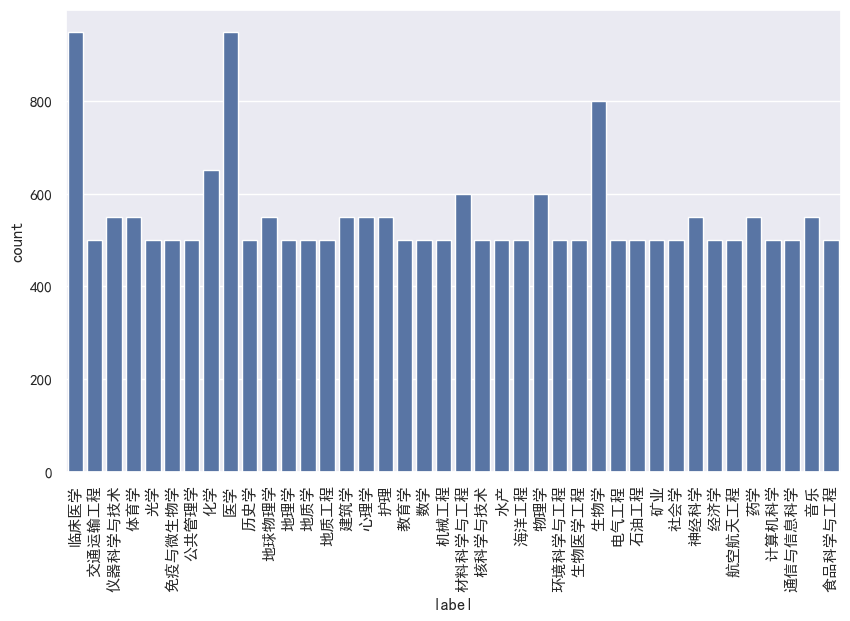

In [55]:
rc = {
    'font.sans-serif': 'SimHei',
    'axes.unicode_minus': False,
}
plt.figure(figsize=(10, 6), dpi=100)
sns.set(rc=rc)
sns.barplot(x=label_distribution['label'], y=label_distribution['count'])
plt.xticks(rotation=90)
plt.show()